# Simple xarray demo

In [1]:
import xarray as xr 

## Manipulations requiring only NetCDF metadata access

### Create a virtual dataset by concatenating many files along time axis

In [2]:
files = '/g/data/ik11/outputs/access-om2/1deg_jra55_iaf_omip2_cycle1/output*/ocean/ocean_month.nc'
ds = xr.open_mfdataset(files, parallel=True)  # concatenate many NetCDF files into one virtual dataset object

In [3]:
ds

<xarray.Dataset>
Dimensions:                    (xt_ocean: 360, yt_ocean: 300, time: 732, nv: 2,
                                st_ocean: 50, st_edges_ocean: 51,
                                xu_ocean: 360, yu_ocean: 300, sw_ocean: 50,
                                sw_edges_ocean: 51, grid_xu_ocean: 360,
                                grid_yt_ocean: 300, potrho: 80,
                                potrho_edges: 81, grid_xt_ocean: 360,
                                grid_yu_ocean: 300, neutral: 80,
                                neutralrho_edges: 81)
Coordinates: (12/18)
  * xt_ocean                   (xt_ocean) float64 -279.5 -278.5 ... 78.5 79.5
  * yt_ocean                   (yt_ocean) float64 -77.88 -77.63 ... 89.32 89.77
  * time                       (time) datetime64[ns] 1958-01-14T12:00:00 ... ...
  * nv                         (nv) float64 1.0 2.0
  * st_ocean                   (st_ocean) float64 1.152 3.649 ... 5.254e+03
  * st_edges_ocean             (st_edges_ocean) float64 0.0 2.303 ... 5.363e+03
    ...                         ...
  * potrho                     (potrho) float64 1.028e+03 ... 1.038e+03
  * potrho_edges               (potrho_edges) float64 1.028e+03 ... 1.038e+03
  * grid_xt_ocean              (grid_xt_ocean) float64 -279.5 -278.5 ... 79.5
  * grid_yu_ocean              (grid_yu_ocean) float64 -77.75 -77.51 ... 90.0
  * neutral                    (neutral) float64 1.028e+03 ... 1.038e+03
  * neutralrho_edges           (neutralrho_edges) float64 1.028e+03 ... 1.038...
Data variables: (12/104)
    pbot_t                     (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    patm_t                     (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    rho_dzt                    (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(12, 50, 300, 360), meta=np.ndarray>
    dht                        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(12, 50, 300, 360), meta=np.ndarray>
    sea_level                  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    sea_level_sq               (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    ...                         ...
    surface_pot_temp_max       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    surface_pot_temp_min       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    average_T1                 (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
    average_T2                 (time) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
    average_DT                 (time) timedelta64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
    time_bounds                (time, nv) timedelta64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
Attributes:
    filename:   ocean_month.nc
    title:      ACCESS-OM2-BGC
    grid_type:  mosaic
    grid_tile:  1

### Extract and subset temperature data

In [4]:
t = ds.pot_temp  # select 4D potential temperature dataarray from dataset

In [5]:
t

<xarray.DataArray 'pot_temp' (time: 732, st_ocean: 50, yt_ocean: 300,
                              xt_ocean: 360)>
dask.array<concatenate, shape=(732, 50, 300, 360), dtype=float32, chunksize=(12, 50, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time      (time) datetime64[ns] 1958-01-14T12:00:00 ... 2018-12-14T12:00:00
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
Attributes:
    long_name:      Potential temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_potential_temperature

In [6]:
t = t.sel(time=slice('2010-01-01', '2022-01-01'))  # subset on time axis

In [7]:
t

<xarray.DataArray 'pot_temp' (time: 108, st_ocean: 50, yt_ocean: 300,
                              xt_ocean: 360)>
dask.array<getitem, shape=(108, 50, 300, 360), dtype=float32, chunksize=(12, 50, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time      (time) datetime64[ns] 2010-01-14T12:00:00 ... 2018-12-14T12:00:00
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
Attributes:
    long_name:      Potential temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_potential_temperature

In [8]:
t = t.interp(st_ocean=100, method='linear')  # extract 2D interpolated data at 100m depth

In [9]:
t

<xarray.DataArray 'pot_temp' (time: 108, yt_ocean: 300, xt_ocean: 360)>
dask.array<chunked_aware_interpnd, shape=(108, 300, 360), dtype=float32, chunksize=(12, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time      (time) datetime64[ns] 2010-01-14T12:00:00 ... 2018-12-14T12:00:00
    st_ocean  int64 100
Attributes:
    long_name:      Potential temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_potential_temperature

In [10]:
t = t.groupby('time.month').mean()  # monthly averages

In [11]:
t

<xarray.DataArray 'pot_temp' (month: 12, yt_ocean: 300, xt_ocean: 360)>
dask.array<transpose, shape=(12, 300, 360), dtype=float32, chunksize=(12, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
    st_ocean  int64 100
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Potential temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_potential_temperature

In [12]:
t = t.sel(month=1) - 273.15   # January mean, converted to °C

## Access required subset of NetCDF data and do the calculation

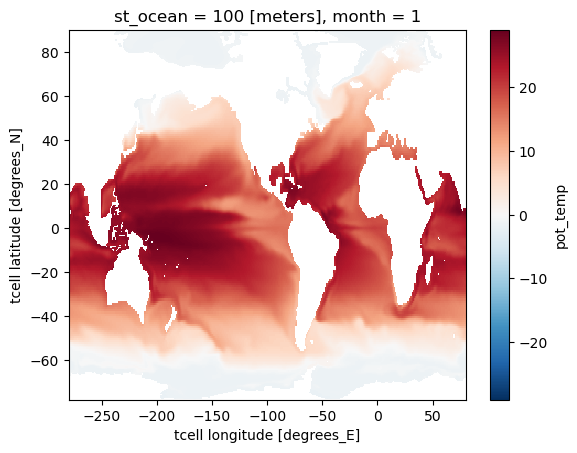

In [13]:
t.plot()  # plot – this is when data access and calculation occur